In [1]:
# Following this, then in the p3workshop running pip install let me install the modules
#http://echrislynch.com/2019/02/01/adding-an-environment-to-jupyter-notebooks/


# Wine Folly: https://winefolly.com/deep-dive/understanding-acidity-in-wine/

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('wineQualityReds.csv')

In [3]:
data.head()

Unnamed: 0  fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
0           1            7.4              0.70         0.00             1.9   
1           2            7.8              0.88         0.00             2.6   
2           3            7.8              0.76         0.04             2.3   
3           4           11.2              0.28         0.56             1.9   
4           5            7.4              0.70         0.00             1.9   

   chlorides  free.sulfur.dioxide  total.sulfur.dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65      9.8        5  
3       0.58      9.8        6  
4       0.56      9.4        5

In [4]:
data.describe()

Unnamed: 0  fixed.acidity  volatile.acidity  citric.acid  \
count  1599.000000    1599.000000       1599.000000  1599.000000   
mean    800.000000       8.319637          0.527821     0.270976   
std     461.735855       1.741096          0.179060     0.194801   
min       1.000000       4.600000          0.120000     0.000000   
25%     400.500000       7.100000          0.390000     0.090000   
50%     800.000000       7.900000          0.520000     0.260000   
75%    1199.500000       9.200000          0.640000     0.420000   
max    1599.000000      15.900000          1.580000     1.000000   

       residual.sugar    chlorides  free.sulfur.dioxide  total.sulfur.dioxide  \
count     1599.000000  1599.000000          1599.000000           1599.000000   
mean         2.538806     0.087467            15.874922             46.467792   
std          1.409928     0.047065            10.460157             32.895324   
min          0.900000     0.012000             1.000000              6.000000   
25%          1.900000     0.070000             7.000000             22.000000   
50%          2.200000     0.079000            14.000000             38.000000   
75%          2.600000     0.090000            21.000000             62.000000   
max         15.500000     0.611000            72.000000            289.000000   

           density           pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  1599.000000  
mean      0.996747     3.311113     0.658149    10.422983     5.636023  
std       0.001887     0.154386     0.169507     1.065668     0.807569  
min       0.990070     2.740000     0.330000     8.400000     3.000000  
25%       0.995600     3.210000     0.550000     9.500000     5.000000  
50%       0.996750     3.310000     0.620000    10.200000     6.000000  
75%       0.997835     3.400000     0.730000    11.100000     6.000000  
max       1.003690     4.010000     2.000000    14.900000     8.000000

We have loaded in the data set, and now we want to start exploring it to learn about what influences wine quality. To start, let's plot histograms of all the physiochemical data in the data set to get a sense for their ranges. Since ultimately we are interested in the quality of the wines, we show each histogram bar partitioned by height according to the number of wines in the data set with a certain quality at that physiochemical value. The highest quality wines are at the bottom, and lowest quality at the top. Peruse these, and there will be more discussion after.

In [5]:
data["GoodBad"] = np.sign(data["quality"]-6.5) # create a data columns where 1 is 'good' (quality 7 or better) and 0 is 'bad.'

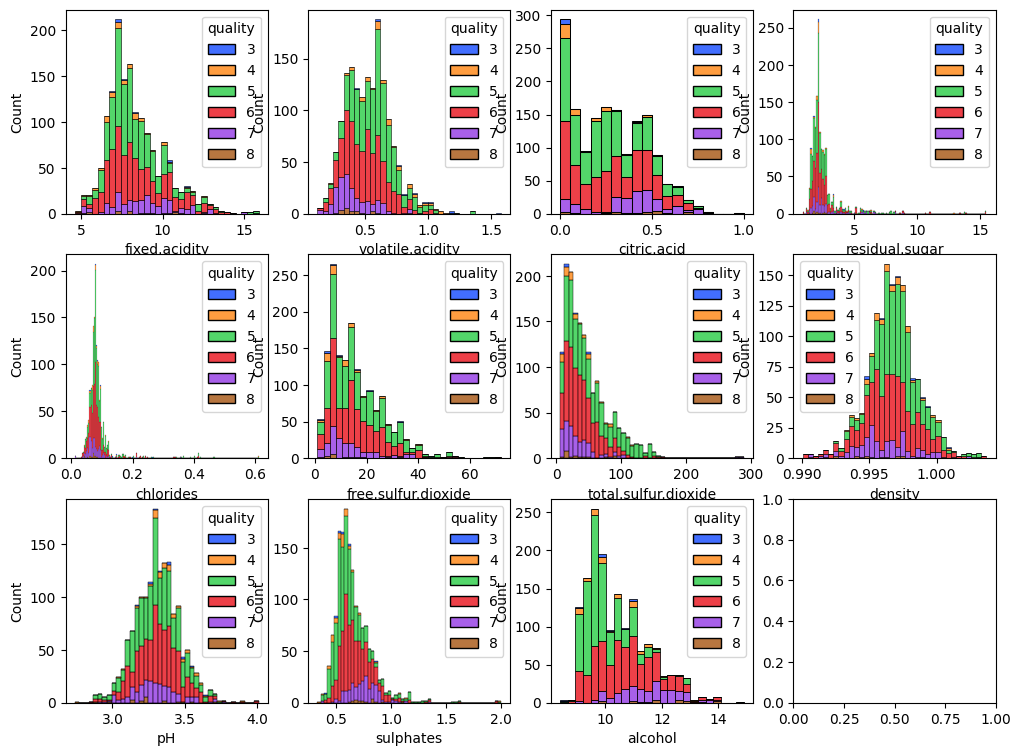

In [6]:
col_names = data.columns
sns.set_palette("bright")
fig, axs = plt.subplots(3,4, figsize=(12,9))
for i in range(11):
    sns.histplot(data=data, x=col_names[i+1], hue="quality", multiple='stack', palette='bright', ax=axs[i//4,i%4])
#sns.histplot(data=data, x="fixed.acidity", hue="quality", multiple='stack', palette='bright', ax=axs[0,0])
#sns.histplot(data=data, x="volatile.acidity", hue="quality", multiple='stack', palette="bright", ax=axs[0,1])
#sns.histplot(data=data, x="quality", hue="fixed.acidity", multiple='stack', palette='bright')
#sns.kdeplot(data=data["fixed.acidity"], fill=True)

We can make a couple observations from the histograms above. First, most of the distributions appear Gaussian, or normal. The obvious exceptions are the sulfur dioxide distributions which appear either Gamma or exponential. Also, sugare and chlorides seem to have to very high outliar points we might want to manipulate later to make the visuals more appealing.
To learn about what drives the quality, let's lump together quality values 7 and 8 (purple and brown) and compare against quality value 5, as this is visually easy. Three histograms jump out as having clearly different means for high-quality and low-quality wines; the volatile acidity, sulphates, and alcohol. It appears lower volatile acidity is generally preferable to higher, while higher sulphates are preferable to lower. This fits with the presence of suphates in wines despite the health warnings on the bottles.

Let's visualize these differences with a violin plots, first for volatile acidity. It's also noteworthy that while lower volatile acidity tends to be a requisite for high quality, higher citric acid in wines tends to give high quality. Since acidity is a great jumping-off point for understanding wines we'll start here and circle back to sulphates and alcohol later.

<AxesSubplot:xlabel='quality', ylabel='volatile.acidity'>

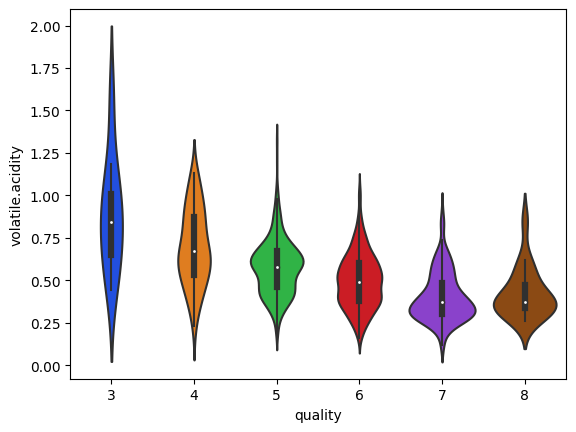

In [7]:
sns.violinplot(data=data, x="quality", y="volatile.acidity")

<AxesSubplot:xlabel='quality', ylabel='citric.acid'>

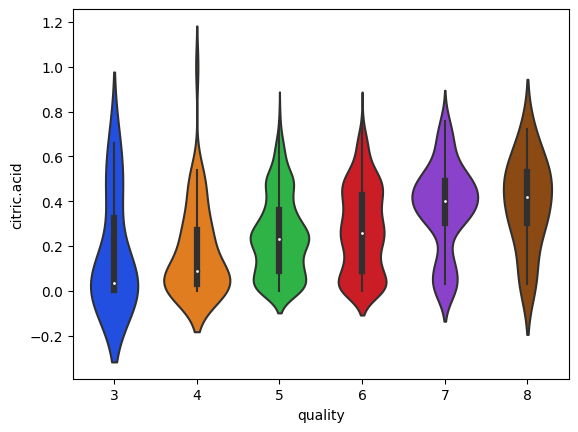

In [8]:
sns.violinplot(data=data, x="quality", y="citric.acid")

<AxesSubplot:xlabel='GoodBad', ylabel='volatile.acidity'>

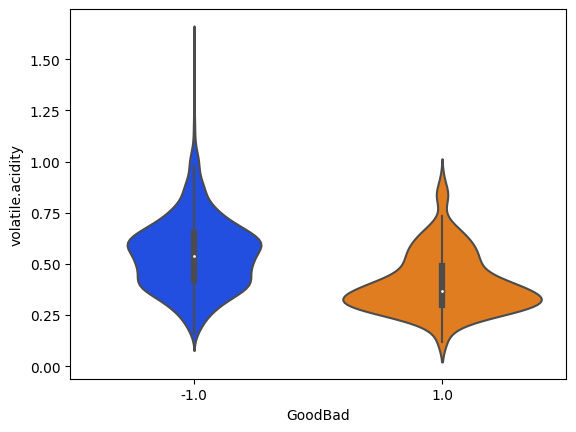

In [9]:
sns.violinplot(data=data, x="GoodBad", y="volatile.acidity")

<AxesSubplot:xlabel='GoodBad', ylabel='fixed.acidity'>

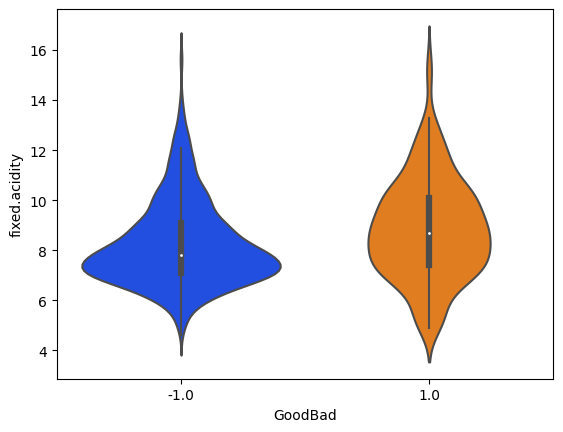

In [10]:
sns.violinplot(data=data, x="GoodBad", y="fixed.acidity")

<AxesSubplot:xlabel='GoodBad', ylabel='citric.acid'>

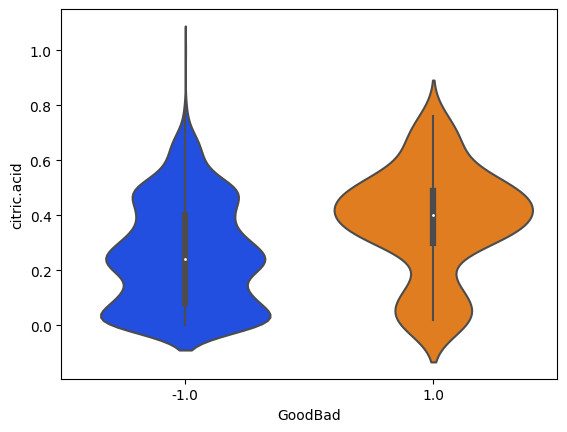

In [11]:
sns.violinplot(data=data, x="GoodBad", y="citric.acid")

In [12]:
#sns.violinplot(data=data, x="GoodBad", y="sulphates")

Next, let's explore the three different types of acidity: fixed, volatile, and citric. For ease of viewing, the qualities have been partitioned into good (value 1; quality 7 or 8) and bad (value -1; quality 6 or below). Since acidity is also likely related to pH, we will include pH here as well. From the information in the data set, volatile acidity is mostly acetic acid, famous for vinegar, which is generally regarded as bad tasting. Most of the remaining acids are fixed, or non-volatile. According to Wine Folly, the main types are tartaric, malic, and citric. 

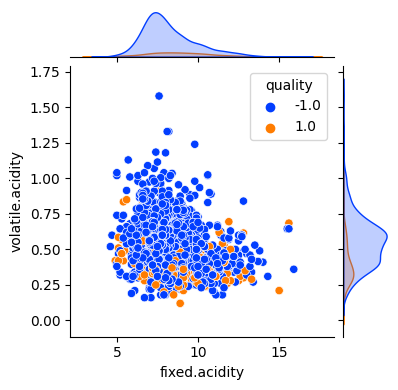

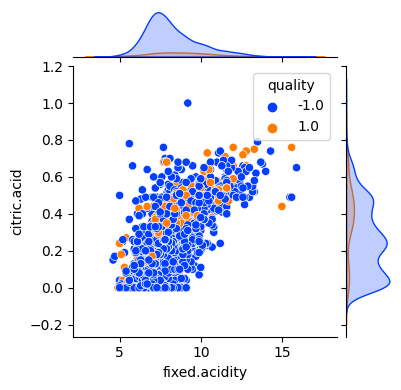

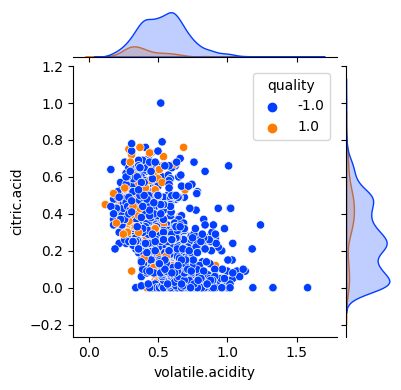

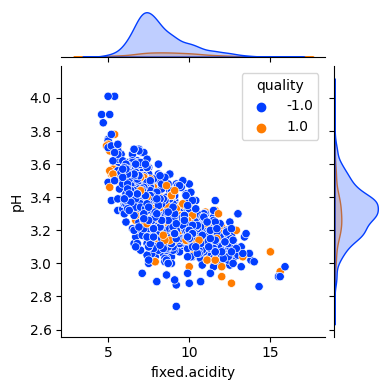

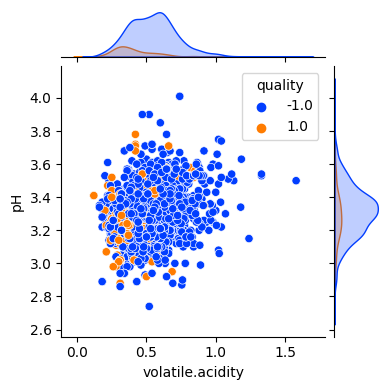

In [13]:
#fig, axs = plt.subplots(1,3, figsize=(12,4))
size = 4
sns.jointplot(x=data["fixed.acidity"], y=data["volatile.acidity"], kind='scatter', hue=np.sign(data["quality"]-6.5), palette="bright", height=size)
sns.jointplot(x=data["fixed.acidity"], y=data["citric.acid"], kind='scatter', hue=np.sign(data["quality"]-6.5), palette="bright", height=size)
sns.jointplot(x=data["volatile.acidity"], y=data["citric.acid"], kind='scatter', hue=np.sign(data["quality"]-6.5), palette="bright", height=size)
sns.jointplot(x=data["fixed.acidity"], y=data["pH"], kind='scatter', hue=np.sign(data["quality"]-6.5), palette="bright", height=size)
sns.jointplot(x=data["volatile.acidity"], y=data["pH"], kind='scatter', hue=np.sign(data["quality"]-6.5), palette="bright", height=size)

Overarching observations from the acidity portion, are that the fixed acidity is correlated to the citric acid and pH, while the volatile acidity produced 3 plots with no discernable correlation. However, it is clear that lower volatile acidity is important for a high quality rating. For simplicity moving forward, we will only consider fixed acidity and volatile acidity, assuming most of the information in pH and citric acid is expressed in the fixed acidity.

According to Wine Folly, the sweeter the wine, the less acidic it tastes. Let's see if we can find this trend in the data. As a reminder, the sugar property showed some very high values that interfered with the visualization. So, to start, we will map all values above 5 to 5 and call this new column "my_sugar". This will make it appear bimodal, but we will know it really is not.

In [14]:
data["my_sugar"] = pd.Series([min(5, i) for i in data["residual.sugar"]])

<AxesSubplot:xlabel='my_sugar', ylabel='Count'>

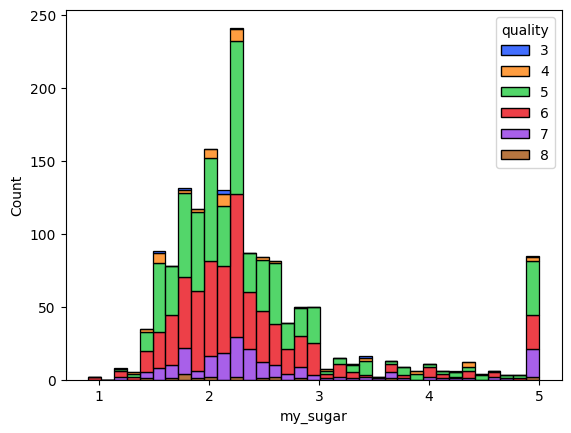

In [15]:
sns.histplot(data=data, x="my_sugar", hue="quality", multiple="stack", palette="bright")

In [16]:
#fig, axs = plt.subplots(1,2, figsize=(9,3))
#sns.lmplot(data=data, x="volatile.acidity", y="my_sugar", hue="GoodBad", palette="bright")
#sns.lmplot(data=data, x="fixed.acidity", y="my_sugar", hue="GoodBad", palette="bright")

In [17]:
data["binned.sugar"] = pd.cut(data["residual.sugar"], [0, 1.8, 2.2, 3, 20],
                                 labels=["Low Sugar", "Med-Low Sugar", "Med-High Sugar", "High Sugar"])

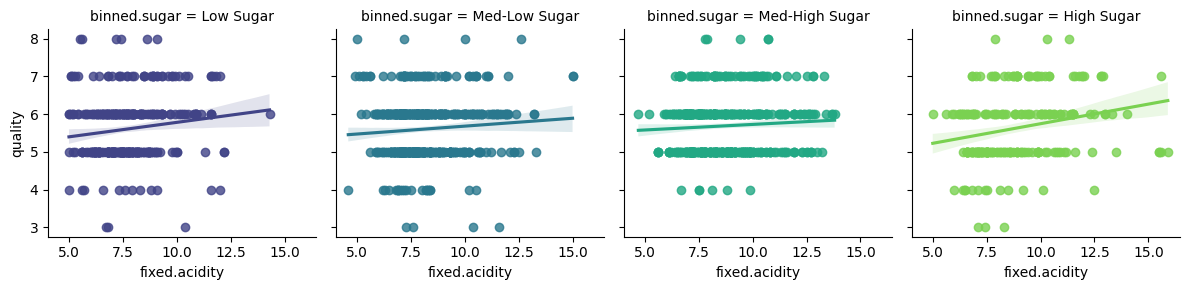

In [18]:
g=sns.FacetGrid(data, col="binned.sugar", hue="binned.sugar", palette="viridis")
g.map(sns.regplot, "fixed.acidity", "quality")

In [19]:
#g=sns.FacetGrid(data, col="binned.sugar", hue="binned.sugar", palette="viridis")
#g.map(sns.regplot, "my_chlorides", "quality")

In [20]:
#g=sns.FacetGrid(data, col="binned.sugar", hue="binned.sugar", palette="viridis")
#g.map(sns.regplot, "Acid_balance", "quality")

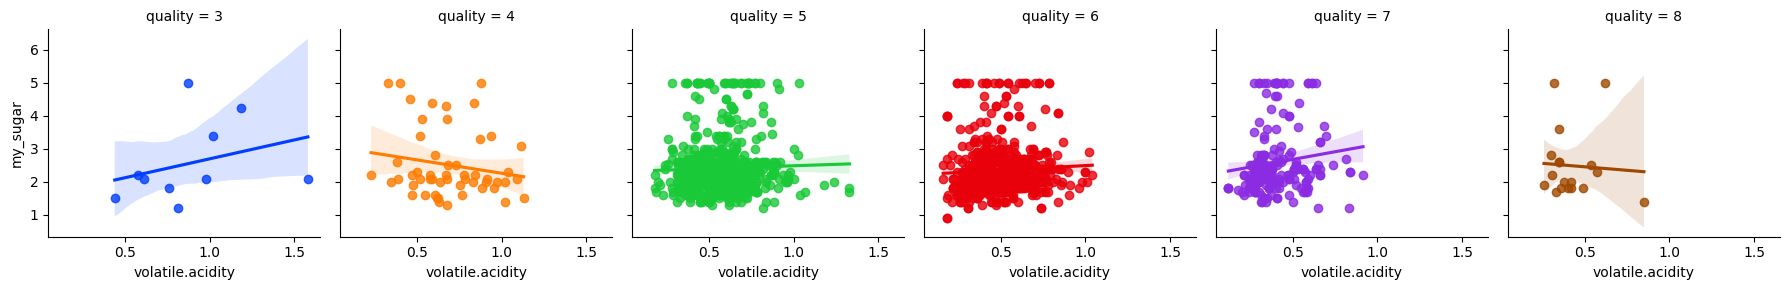

In [21]:
g=sns.FacetGrid(data, col='quality', hue='quality', palette="bright")
g.map(sns.regplot, "volatile.acidity", "my_sugar")

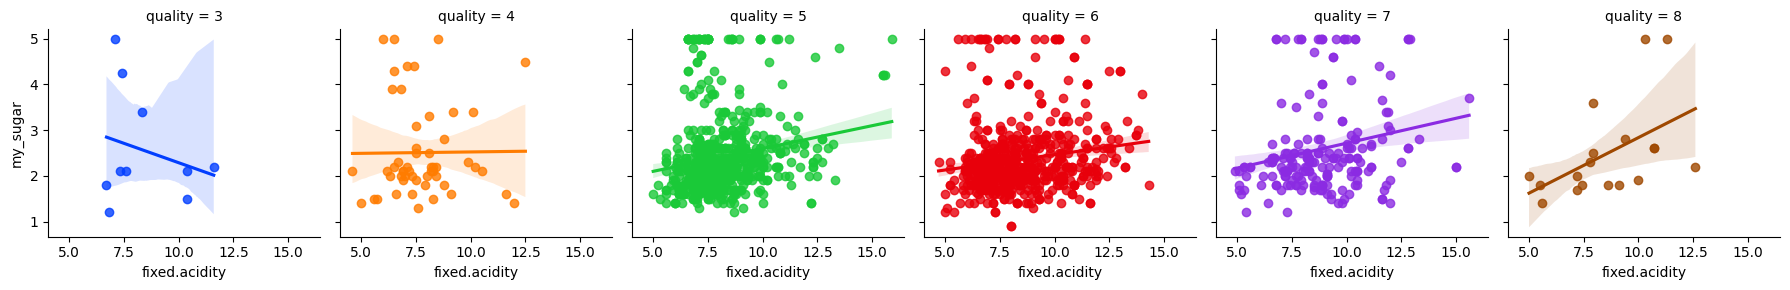

In [22]:
g=sns.FacetGrid(data, col='quality', hue='quality', palette="bright")
g.map(sns.regplot, "fixed.acidity", "my_sugar")

While the above plots don't hint toward predictive ability, they do provide some insight into the wine-making decision process. The trendlines broken out for the specific quality levels indicate that in the higher-quality wines the wine makers are balancing the fixed acidity with sweetness, while in the low-quality wines the wine makers are not. There is not a consistent trend in the correlation between volatile acidity and sugar with quality. This is sensible, as the wine-making goal should be simply to minize the volatile acetic acid as it does not add anything to the wine. On the other hand, fixed acids such as citric can add flavor, making them desirable and leading to the more nuanced approach of balancing the acidity with sugar. We can also see that by this method of classification, the cutoff between 'good' and 'bad' vinho verdo should lie between 4 and 5, not 6 and 7. However, let's keep the current cutoff and see if we can't figure out what makes the very best vinho verde!

Wine Folly also mentions that salt and fat can balance out the distasteful sourness that acidity creates. Since fat is not a component of wine (but it is of food, think wine and cheese), let's look at salt, represented here by chlorides. We'll do the same cutoff technique for chlorides that we did for sugar but with a cutoff of 0.14, and check the new histogram.

In [23]:
data["my_chlorides"] = pd.Series([min(0.14, i) for i in data["chlorides"]])

<AxesSubplot:xlabel='my_chlorides', ylabel='Count'>

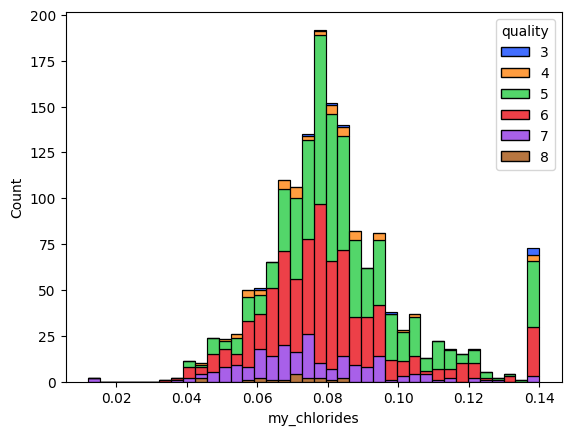

In [24]:
sns.histplot(data=data, x="my_chlorides", hue="quality", multiple='stack', palette='bright')

In [25]:
data["binned.chlorides"] = pd.cut(data["chlorides"], [0, 0.064, 0.08, 0.096, 0.7],
                                 labels=["Low Salt", "Med-Low Salt", "Med-High Salt", "High Salt"])

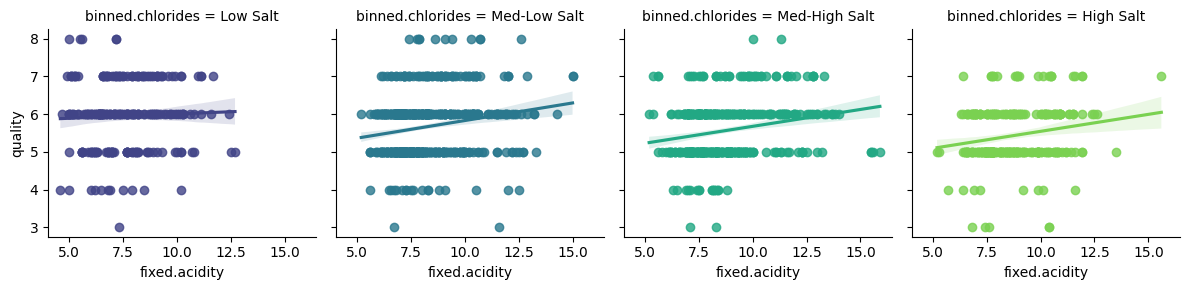

In [26]:
g=sns.FacetGrid(data, col="binned.chlorides", hue="binned.chlorides", palette="viridis")
g.map(sns.regplot, "fixed.acidity", "quality")

In [27]:
#g=sns.FacetGrid(data, col="binned.chlorides", hue="binned.chlorides", palette="viridis")
#g.map(sns.regplot, "my_sugar", "quality")

In [28]:
#g=sns.FacetGrid(data, col="binned.chlorides", hue="binned.chlorides", palette="viridis")
#g.map(sns.regplot, "Acid_balance", "quality")

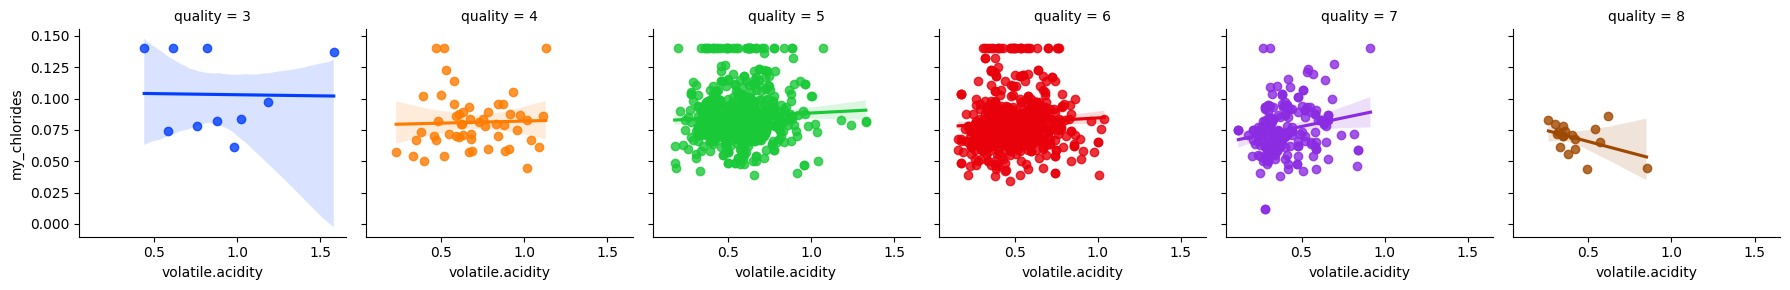

In [29]:
g=sns.FacetGrid(data, col='quality', hue='quality', palette="bright")
g.map(sns.regplot, "volatile.acidity", "my_chlorides")

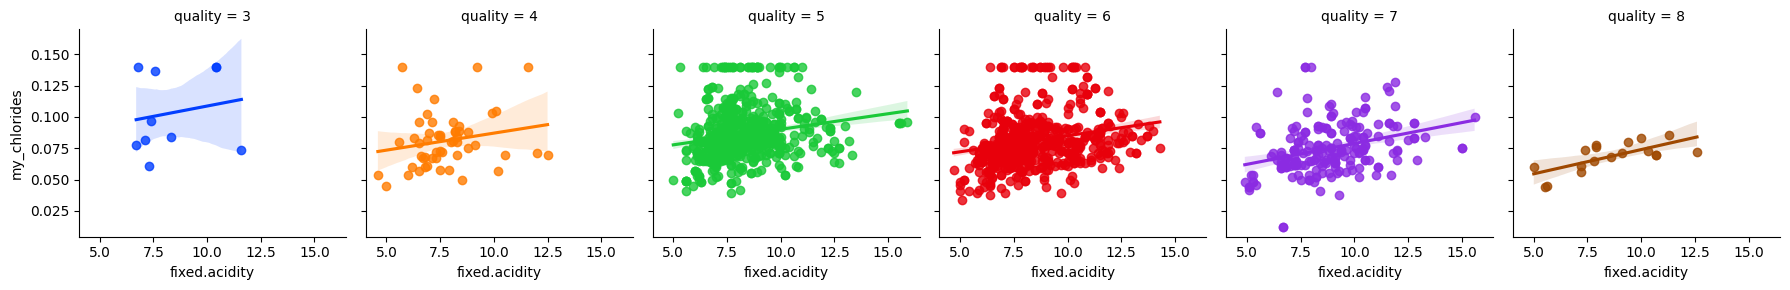

In [30]:
g=sns.FacetGrid(data, col='quality', hue='quality', palette="bright")
g.map(sns.regplot, "fixed.acidity", "my_chlorides")

As with the sugars, we find evidence that winemakers are using salt to balance the negative aspects of the fixed acids. It is worth noting that the good wines (7 and 8) clearly use less sodium than the bad wines. This was not as clear in the histogram, so let's check it in a violin plot.

<AxesSubplot:xlabel='quality', ylabel='my_chlorides'>

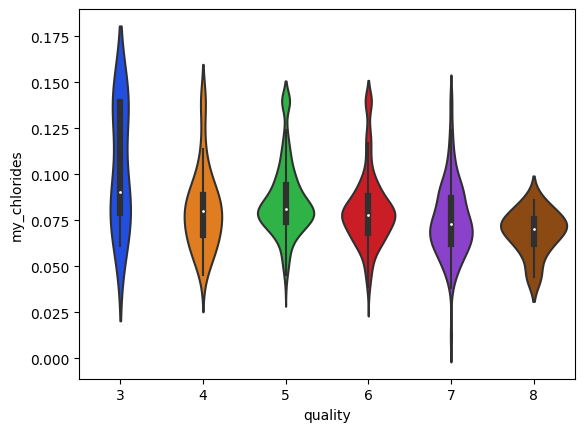

In [31]:
sns.violinplot(data=data, x="quality", y="my_chlorides", palette="bright")

To summarize so far, the best flavor of the vinho verde wine comes from the citric acid, a fixed acid. Wine Folly lists the first three primary flavors of vinho verde to be lemonade, pink grapefruit, and lime zest. What do these all have in common? Citric acid! The problem presenting the winemakers is how to get the good flavors from the citric (and other fixed) acids while mellowing out the bad sourness of those same acids. The two main ways of doing so are to add sweetness via sugar and saltiness via chlorides.

Let's see if we can find any trends in the sugar and chlorides usages that might predict quality.

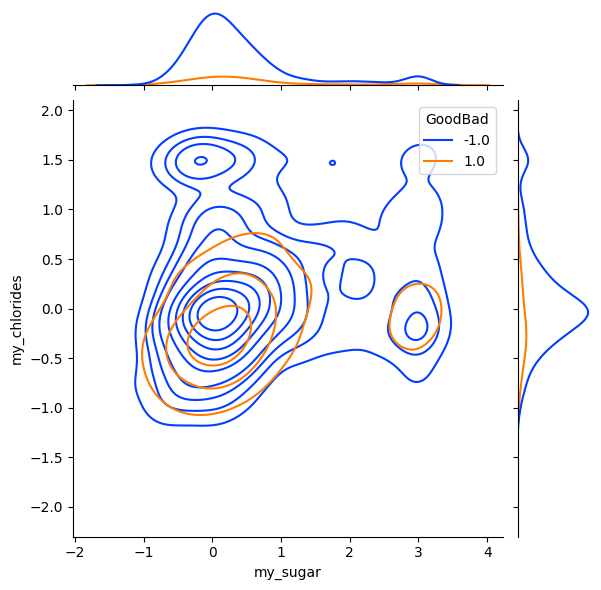

In [32]:
sns.jointplot(x=(data["my_sugar"]-2.)/1., y=(data["my_chlorides"]-0.08)/0.04, hue=data["GoodBad"], palette="bright", kind='kde')

The contours for good and bad wine appear on top of each other. This is a sign that classifying wines by quality based on the amount of salt and sugar is unlikely to be productive, at least in a linear way.

In [33]:
def acid_balance(acid, sugar, salt):
    sour = (acid-9.)/4.
    balance = (0.0*(sugar-2.)/1. + 2.0*(salt-0.08)/0.04) - (2*sour)
    return balance/2.
def off_balance(acid, sugar, salt, p, a):
    acid = (acid-9.)/4.
    sugar = (sugar-2.)/1.
    salt = (salt-0.08)/0.04
    acid_slope = a
    sugar_slope = 1.-p
    salt_slope = 1.+p
    s_slope = sugar_slope + salt_slope
    return abs(acid_slope*acid + (sugar_slope*sugar+salt_slope*salt))/(np.sqrt(acid_slope**2 + s_slope**2))

<AxesSubplot:ylabel='quality'>

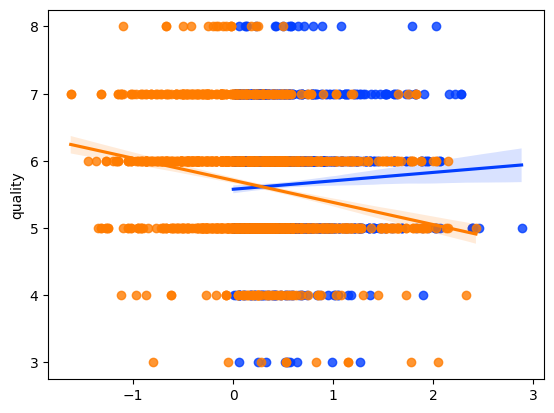

In [34]:
#sns.jointplot(x=acid_balance(data["my_sugar"], data["my_chlorides"]), y=data["fixed.acidity"], hue=data["GoodBad"], palette="bright", kind='kde')
sns.regplot(x=off_balance(data["fixed.acidity"], data["my_sugar"], data["my_chlorides"], -0.5, 2.), y=data["quality"])
sns.regplot(x=acid_balance(data["fixed.acidity"], data["my_sugar"], data["my_chlorides"]), y=data["quality"])
#sns.regplot(x=2.*(data["my_chlorides"]-0.08)/0.04, y=data["quality"])
#plt.xlim(-10, 10)

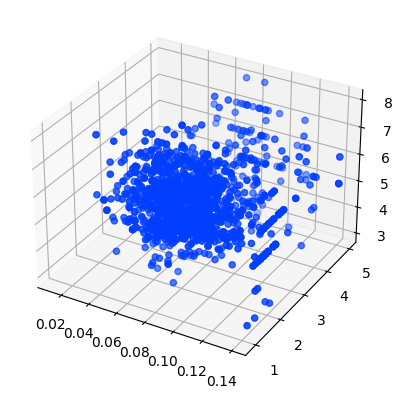

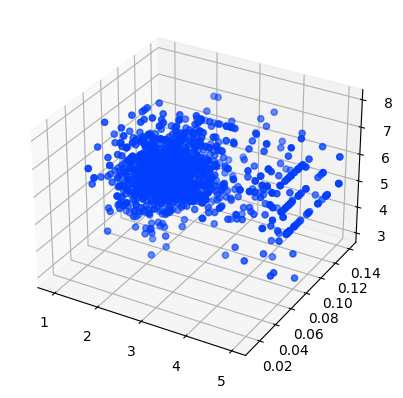

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["my_chlorides"], data['my_sugar'], data["quality"])
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['my_sugar'], data["my_chlorides"], data["quality"])
plt.show()

<AxesSubplot:xlabel='volatile.acidity', ylabel='Count'>

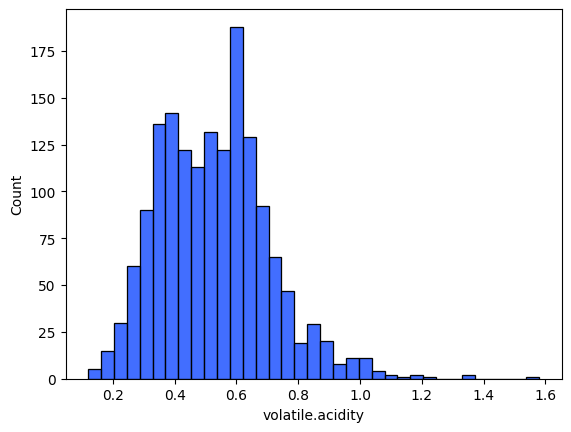

In [36]:
sns.histplot(data["volatile.acidity"])

In [37]:
data["binned.vacidity"] = pd.cut(data["volatile.acidity"], [0, 0.35, 0.5, 0.7, 1.6],
                                 labels=["Low V-Acid", "Med-Low V-Acid", "Med-High V-Acid", "High V-acid"])

<AxesSubplot:xlabel='fixed.acidity', ylabel='Count'>

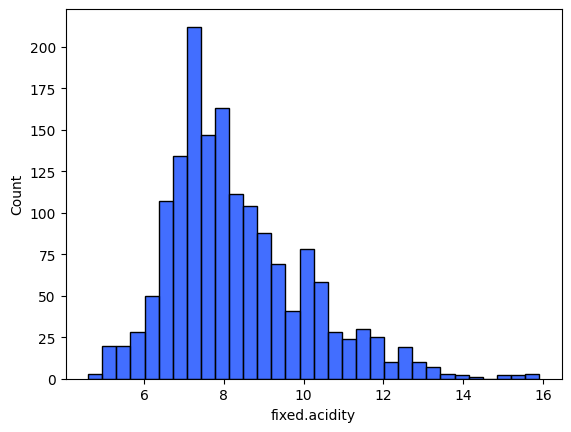

In [38]:
sns.histplot(data["fixed.acidity"])

In [39]:
data["binned.facidity"] = pd.cut(data["fixed.acidity"], [0, 6.5, 8, 9.5, 11, 16],
                                 labels=["Low F-Acid", "Med-Low F-Acid", "Med F-Acid", "Med-High F-Acid", "High F-acid"])
data["Acid_balance"] = acid_balance(data["fixed.acidity"], data["my_sugar"], data["my_chlorides"])

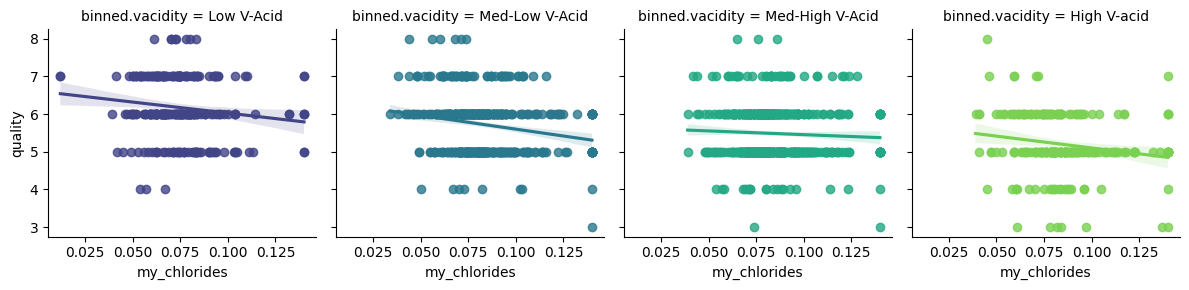

In [40]:
g=sns.FacetGrid(data, col="binned.vacidity", hue="binned.vacidity", palette="viridis")
g.map(sns.regplot, "my_chlorides", "quality")

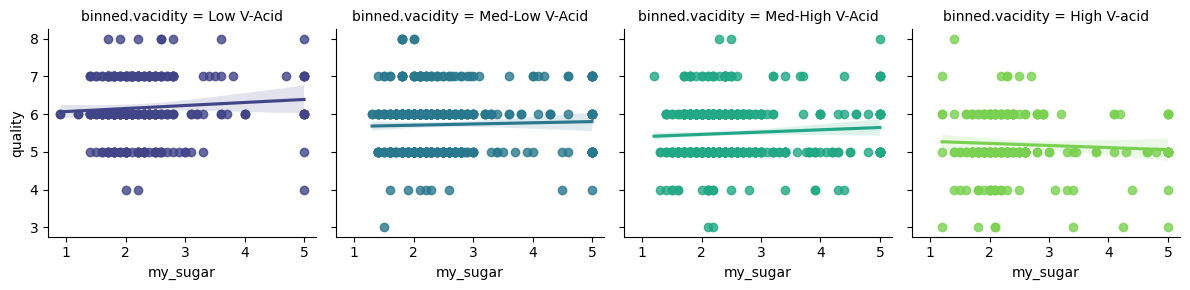

In [41]:
g=sns.FacetGrid(data, col="binned.vacidity", hue="binned.vacidity", palette="viridis")
g.map(sns.regplot, "my_sugar", "quality")

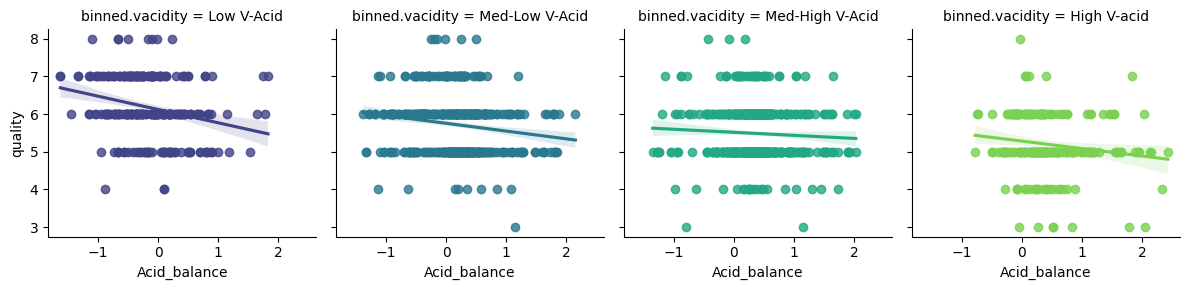

In [42]:
g=sns.FacetGrid(data, col="binned.vacidity", hue="binned.vacidity", palette="viridis")
g.map(sns.regplot, "Acid_balance", "quality")

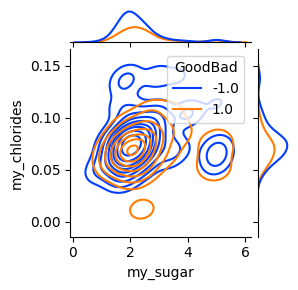

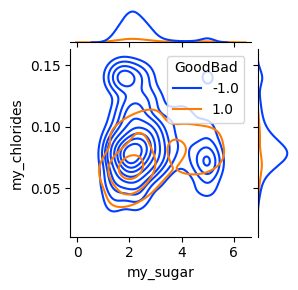

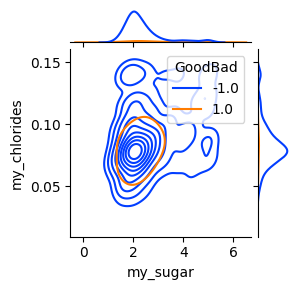

In [43]:
sns.jointplot(x=data[data["binned.vacidity"]=="Low V-Acid"]["my_sugar"],
              y=data[data["binned.vacidity"]=="Low V-Acid"]["my_chlorides"],
              hue=data["GoodBad"], palette="bright", kind="kde", height=3)
sns.jointplot(x=data[data["binned.vacidity"]=="Med-Low V-Acid"]["my_sugar"],
              y=data[data["binned.vacidity"]=="Med-Low V-Acid"]["my_chlorides"],
              hue=data["GoodBad"], palette="bright", kind="kde", height=3)
sns.jointplot(x=data[data["binned.vacidity"]=="Med-High V-Acid"]["my_sugar"],
              y=data[data["binned.vacidity"]=="Med-High V-Acid"]["my_chlorides"],
              hue=data["GoodBad"], palette="bright", kind="kde", height=3)
#sns.jointplot(x=data[data["binned.vacidity"]=="High V-Acid"]["my_sugar"],
#              y=data[data["binned.vacidity"]=="High V-Acid"]["my_chlorides"],
#              hue=data["GoodBad"], palette="bright", kind="kde", height=3)
#data[data["binned.facidity"]=="Low F-Acid"]["my_chlorides"]

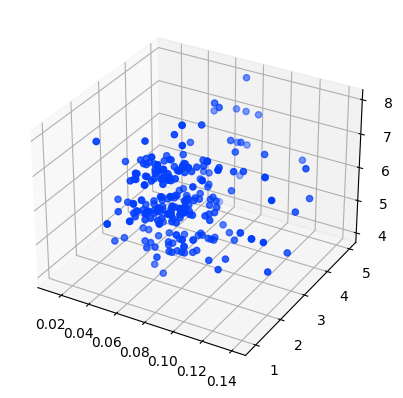

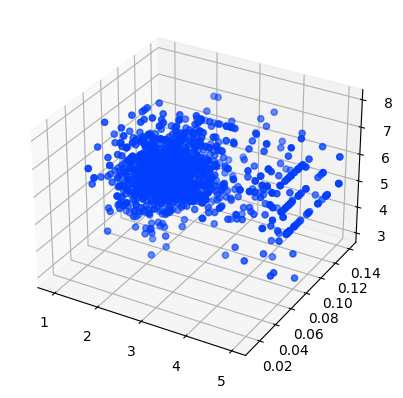

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[data["binned.vacidity"]=="Low V-Acid"]["my_chlorides"],
           data[data["binned.vacidity"]=="Low V-Acid"]['my_sugar'], 
           data[data["binned.vacidity"]=="Low V-Acid"]["quality"])
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['my_sugar'], data["my_chlorides"], data["quality"])
plt.show()

The saltiness and sugar combining to balance the fixed acidity failed looking only at linear relationships. We now move on to data mining the data set to try to figure out where to go next. For starters, I plot scatter plots of quality v the remaining properties. Then I look at mutual information.

Index(['Unnamed: 0', 'fixed.acidity', 'volatile.acidity', 'citric.acid',
       'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'GoodBad'],
      dtype='object')


<AxesSubplot:xlabel='alcohol', ylabel='quality'>

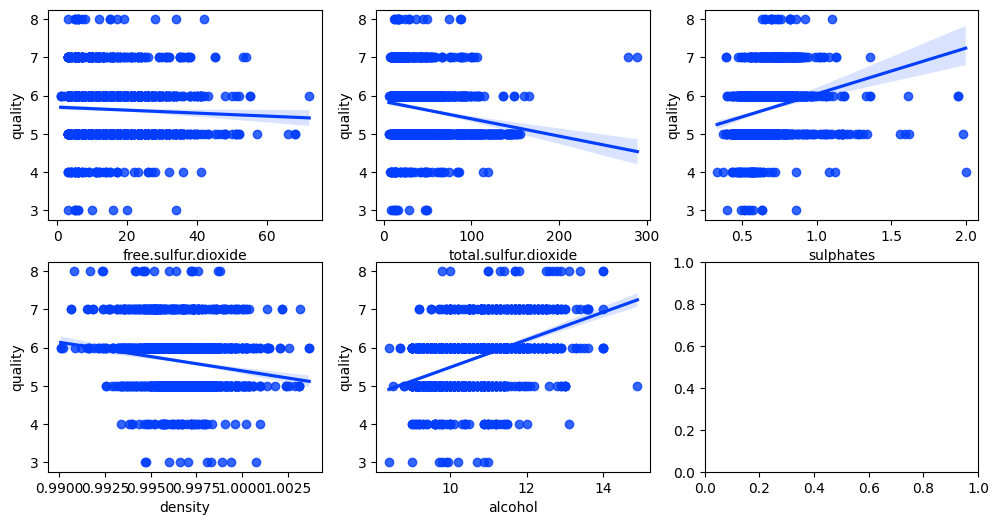

In [45]:
print(col_names)

fig, axs = plt.subplots(2,3, figsize=(12,6))
sns.regplot(x=data["free.sulfur.dioxide"], y=data["quality"], ax=axs[0,0])
sns.regplot(x=data["total.sulfur.dioxide"], y=data["quality"], ax=axs[0,1])
sns.regplot(x=data["sulphates"], y=data["quality"], ax=axs[0,2])
sns.regplot(x=data["density"], y=data["quality"], ax=axs[1,0])
sns.regplot(x=data["alcohol"], y=data["quality"], ax=axs[1,1])

We now define our function for mutual information, and compute it for this data set. Because the randomization inherent in the MI calcuation causes variation between different runts, we compute it 20 times and take the averages. As expected from previous analysis, the top properties for prediction quality are alcohol, volatile acidity, ans sulfates.

In [46]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    #mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

X_cols = col_names[1:12]
print(X_cols)
y_col = "quality"

# Scale X data to Gaussian distribution so magnitudes don't impact values
std_scaler = StandardScaler()
X = data[X_cols]
X_scld = std_scaler.fit_transform(X)
X = pd.DataFrame(X_scld, columns=X_cols)
print(X.head())


Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
   fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free.sulfur.dioxide  total.sulfur.dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   


In [47]:
dctry = {i: make_mi_scores(X, data[y_col]) for i in range(20)}
all_scores = pd.DataFrame(dctry)
mi_scores = all_scores.mean(axis=1).sort_values(ascending=False)
print(mi_scores)

alcohol                 0.177592
volatile.acidity        0.117359
sulphates               0.106257
density                 0.086293
total.sulfur.dioxide    0.080915
citric.acid             0.066923
fixed.acidity           0.050775
chlorides               0.032849
residual.sugar          0.027227
free.sulfur.dioxide     0.020063
pH                      0.018477
dtype: float64


<AxesSubplot:xlabel='sulphates', ylabel='quality'>

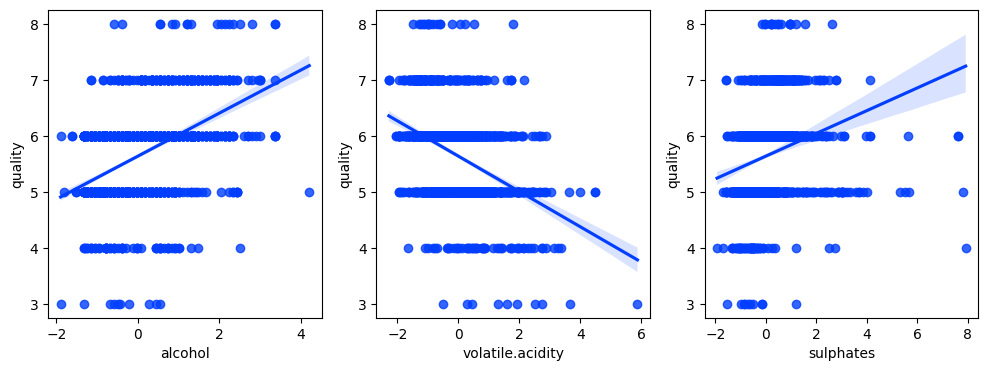

In [48]:
fig, axs = plt.subplots(1,3, figsize=(12,4))
sns.regplot(x=X["alcohol"], y=data["quality"], ax=axs[0])
sns.regplot(x=X["volatile.acidity"], y=data["quality"], ax=axs[1])
sns.regplot(x=X["sulphates"], y=data["quality"], ax=axs[2])

In [49]:
X[["alcohol", "volatile.acidity", "sulphates"]].cov()

alcohol  volatile.acidity  sulphates
alcohol           1.000626         -0.202415   0.093653
volatile.acidity -0.202415          1.000626  -0.261150
sulphates         0.093653         -0.261150   1.000626

In [50]:
X[["alcohol", "volatile.acidity", "sulphates", "density", "total.sulfur.dioxide", "citric.acid"]].cov()

alcohol  volatile.acidity  sulphates   density  \
alcohol               1.000626         -0.202415   0.093653 -0.496490   
volatile.acidity     -0.202415          1.000626  -0.261150  0.022040   
sulphates             0.093653         -0.261150   1.000626  0.148599   
density              -0.496490          0.022040   0.148599  1.000626   
total.sulfur.dioxide -0.205783          0.076518   0.042974  0.071314   
citric.acid           0.109972         -0.552841   0.312966  0.365176   

                      total.sulfur.dioxide  citric.acid  
alcohol                          -0.205783     0.109972  
volatile.acidity                  0.076518    -0.552841  
sulphates                         0.042974     0.312966  
density                           0.071314     0.365176  
total.sulfur.dioxide              1.000626     0.035555  
citric.acid                       0.035555     1.000626

Outside of the top 3 predictors for quality, we see some interesting things pop up in the covariance matrix. Notable relationships are:
(volatile acidity and citric acid); 
(alcohol and density); and
(citric acid and density).

<AxesSubplot:xlabel='citric.acid', ylabel='density'>

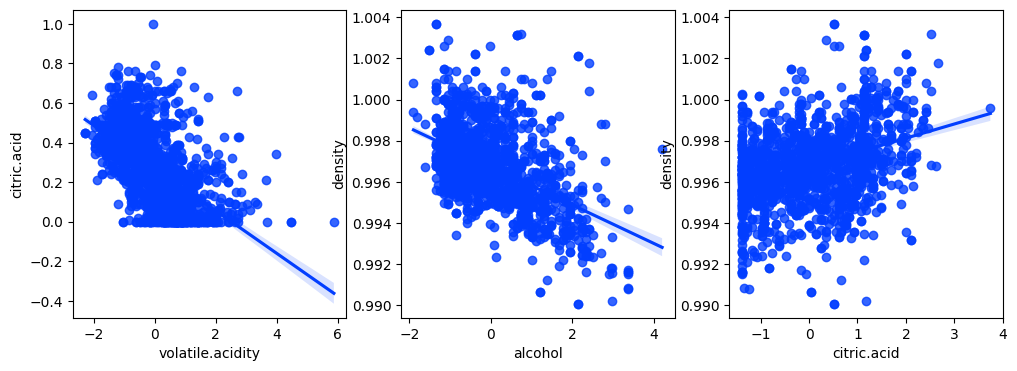

In [51]:
fig, axs = plt.subplots(1,3, figsize=(12,4))
sns.regplot(x=X["volatile.acidity"], y=data["citric.acid"], ax=axs[0])
sns.regplot(x=X["alcohol"], y=data["density"], ax=axs[1])
sns.regplot(x=X["citric.acid"], y=data["density"], ax=axs[2])

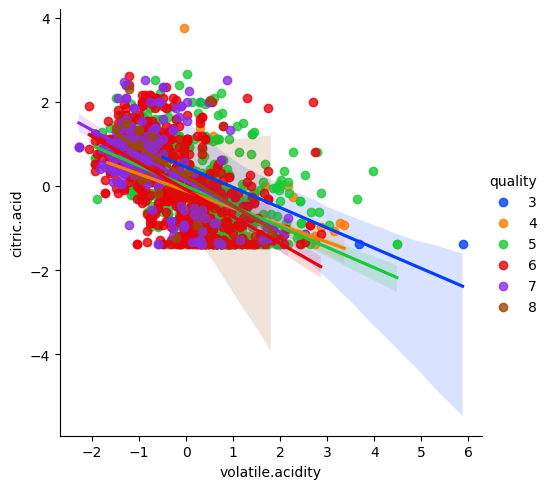

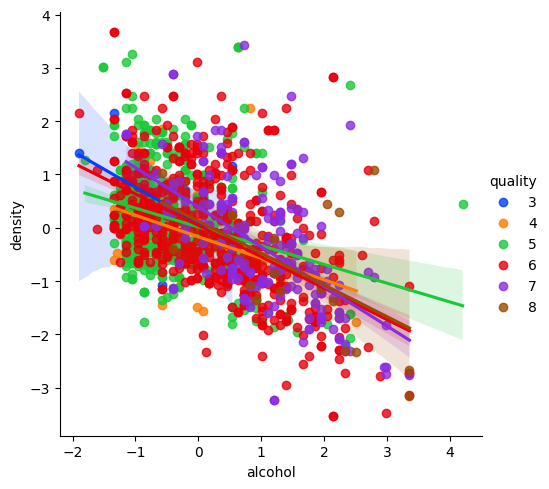

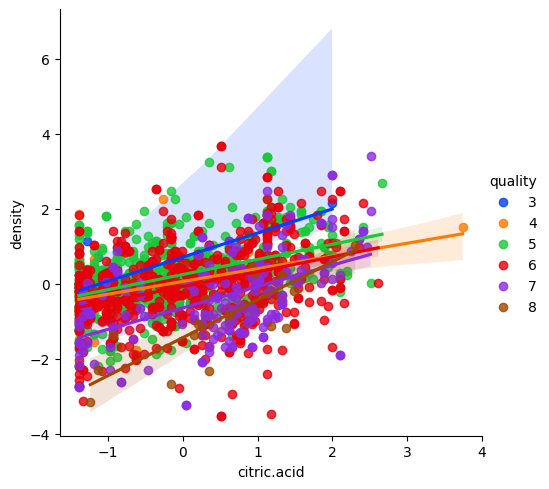

In [52]:
#fig, axs = plt.subplots(1,3, figsize=(12,4))
X_qual = X.copy()
X_qual["quality"] = data["quality"]
X_qual["GoodBad"] = (data["GoodBad"]+1.)/2.
sns.lmplot(data=X_qual, x="volatile.acidity", y="citric.acid", hue="quality")
sns.lmplot(data=X_qual, x="alcohol", y="density", hue="quality")
sns.lmplot(data=X_qual, x="citric.acid", y="density", hue="quality")

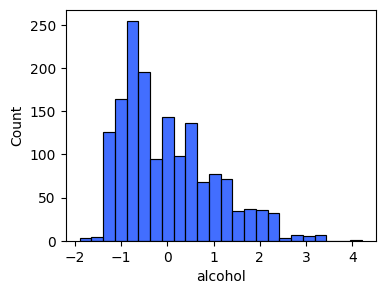

In [53]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.histplot(X_qual["alcohol"], ax=ax)
X_qual["binned.alcohol"] = pd.cut(X_qual["alcohol"], [-2, -0.9, 0, 1.2, 5],
                                  labels=["Low Alc", "Med-Low Alc", "Med-High Alc", "High Alc"])

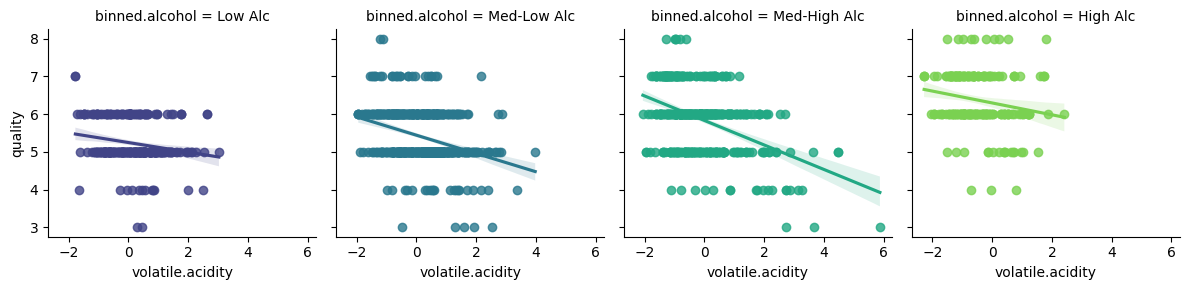

In [54]:
g = sns.FacetGrid(X_qual, col='binned.alcohol', hue='binned.alcohol', palette="viridis")
g.map(sns.regplot, "volatile.acidity", "quality")

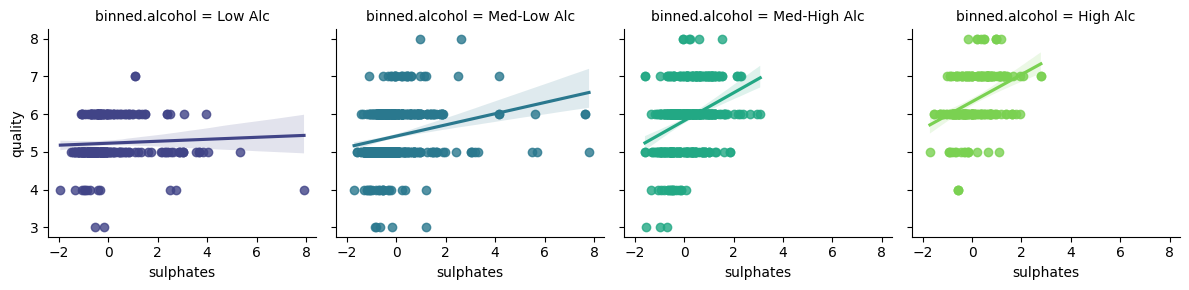

In [55]:
g = sns.FacetGrid(X_qual, col='binned.alcohol', hue='binned.alcohol', palette="viridis")
g.map(sns.regplot, "sulphates", "quality")

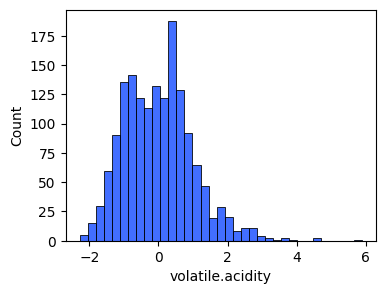

In [56]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.histplot(X_qual["volatile.acidity"], ax=ax)
X_qual["binned.vacidity"] =pd.cut(X_qual["volatile.acidity"], [-3, -1.0, 0, 1.2, 5],
                                  labels=["Low Vacid", "Med-Low Vacid", "Med-High Vacid", "High Vacid"])

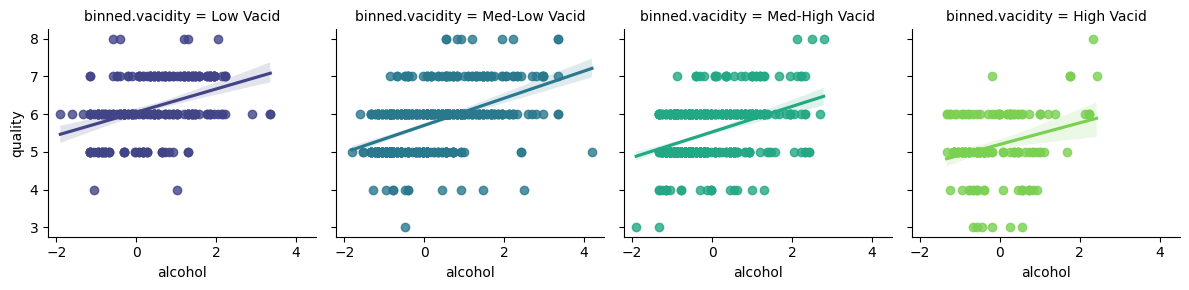

In [57]:
g = sns.FacetGrid(X_qual, col='binned.vacidity', hue='binned.vacidity', palette="viridis")
g.map(sns.regplot, "alcohol", "quality")

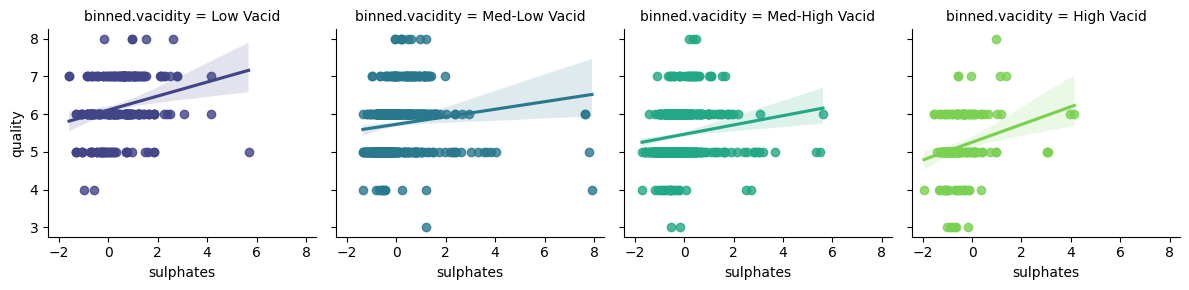

In [58]:
g = sns.FacetGrid(X_qual, col='binned.vacidity', hue='binned.vacidity', palette="viridis")
g.map(sns.regplot, "sulphates", "quality")

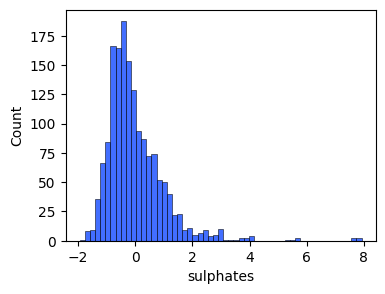

In [59]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.histplot(X_qual["sulphates"], ax=ax)
X_qual["binned.sulphates"] =pd.cut(X_qual["sulphates"], [-3, -1.0, 0, 1.2, 9],
                                  labels=["Low Sulph", "Med-Low Sulph", "Med-High Sulph", "High Sulph"])

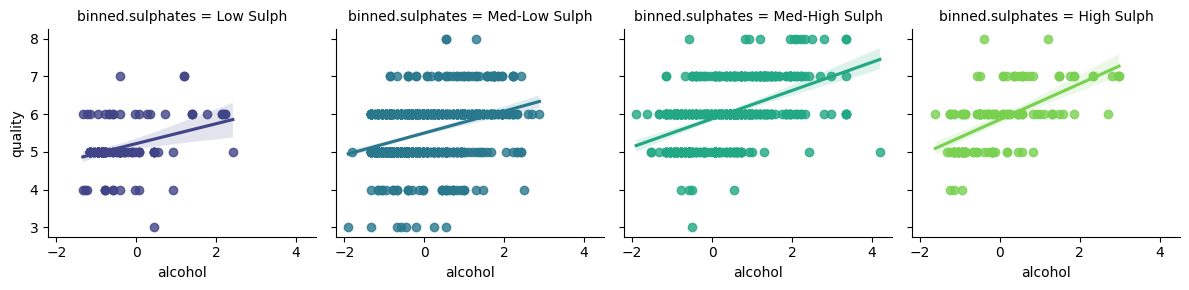

In [60]:
g = sns.FacetGrid(X_qual, col='binned.sulphates', hue='binned.sulphates', palette="viridis")
g.map(sns.regplot, "alcohol", "quality")

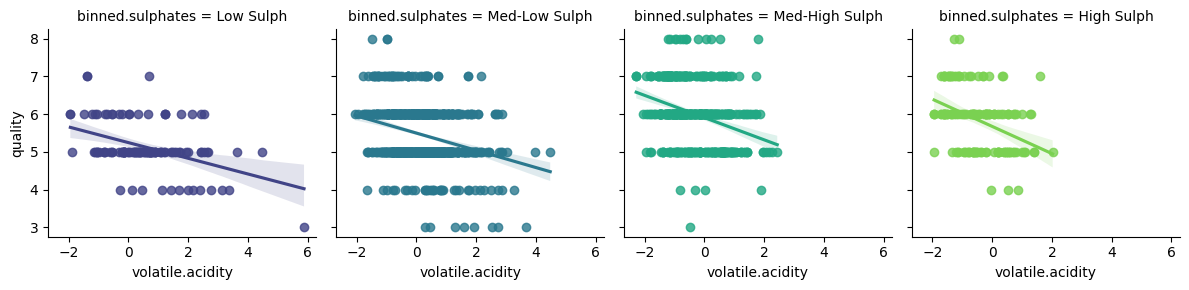

In [61]:
g = sns.FacetGrid(X_qual, col='binned.sulphates', hue='binned.sulphates', palette="viridis")
g.map(sns.regplot, "volatile.acidity", "quality")

Most of these show fairly linear trends with the execption of the sulphates and fixed acidity dependecies on quality when I binned alcohol levels. That is a clear non-linear effect. But to start let's see how far a linear model will get us predicting the wine quality. We want to check accuracy in two ways. First, and most ideal, we want the model to produce the correct quality score. Secondardily, we will see how will the model does at classify the wines into 'good' (7 or 8) and 'bad' (less than 7). Since we eventually we compare against nonlinear machine learning models, we will implement cross-validation and define a loss function for the linear regression.

[0.54069262 0.54065796 0.51005976 0.51388051 0.50390883] 0.5218399365657056
[ 0.32942029 -0.21863593  0.11506403] 5.6360225140712945
    alcohol  volatile.acidity  sulphates
0 -0.960246          0.961877  -0.579207
1 -0.584777          1.967442   0.128950
2 -0.584777          1.297065  -0.048089
3 -0.584777         -1.384443  -0.461180


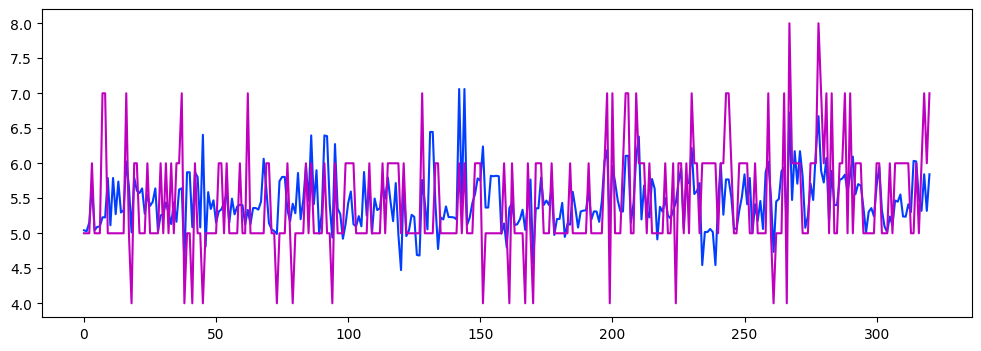

In [62]:
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split

big3 = ["alcohol", "volatile.acidity", "sulphates"]
preprocessor = make_column_transformer((StandardScaler(), big3))
model_lin = linear_model.LinearRegression()

pipeline_lin = Pipeline(steps=[("preprocessor", preprocessor),
                               ("model", model_lin)])
errors_lin = -1*cross_val_score(pipeline_lin, X[big3], X_qual["quality"], cv=5, scoring="neg_mean_absolute_error")

print(errors_lin, np.mean(errors_lin))
#X_train = preprocessor.fit_transform(X_train)
#X_valid = preprocessor.transform(X_valid)

model_lin = linear_model.LinearRegression()
model_lin.fit(X[big3], X_qual["quality"])
print(model_lin.coef_, model_lin.intercept_)
preds3 = model_lin.predict(X_qual.loc[:320,big3])
print(X_qual.loc[:3,big3])
acts = X_qual.loc[:320, "quality"]
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(preds3)
ax.plot(acts, color='m')

[0.53140218 0.53250364 0.51041022 0.5093958  0.50527431] 0.5177972284319294
[ 0.32448653 -0.22319103  0.12030715  0.01852696 -0.07148038 -0.01806977] 5.636022514071295
    alcohol  volatile.acidity  sulphates   density  total.sulfur.dioxide  \
0 -0.960246          0.961877  -0.579207  0.558274             -0.379133   
1 -0.584777          1.967442   0.128950  0.028261              0.624363   
2 -0.584777          1.297065  -0.048089  0.134264              0.229047   
3 -0.584777         -1.384443  -0.461180  0.664277              0.411500   

   citric.acid  
0    -1.391472  
1    -1.391472  
2    -1.186070  
3     1.484154  


Text(0.5, 1.0, 'Linear Model')

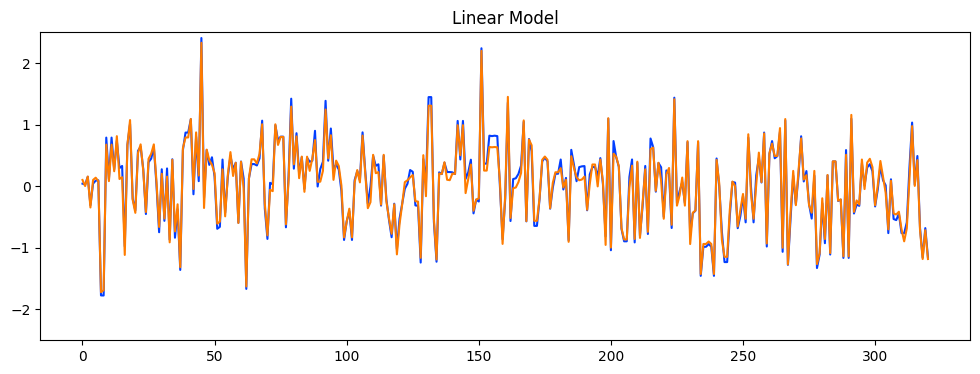

In [63]:
big6 = ["alcohol", "volatile.acidity", "sulphates", "density", "total.sulfur.dioxide", "citric.acid"]
preprocessor = make_column_transformer((StandardScaler(), big6))
model_lin = linear_model.LinearRegression()

pipeline_lin = Pipeline(steps=[("preprocessor", preprocessor),
                               ("model", model_lin)])
errors_lin = -1*cross_val_score(pipeline_lin, X[big6], X_qual["quality"], cv=5, scoring="neg_mean_absolute_error")

print(errors_lin, np.mean(errors_lin))
#X_train = preprocessor.fit_transform(X_train)
#X_valid = preprocessor.transform(X_valid)

model_lin = linear_model.LinearRegression()
model_lin.fit(X[big6], X_qual["quality"])
print(model_lin.coef_, model_lin.intercept_)
preds6 = model_lin.predict(X_qual.loc[:320,big6])
print(X_qual.loc[:3,big6])
acts = X_qual.loc[:320, "quality"]
fig, ax = plt.subplots(figsize=(12, 4))
#ax.plot(preds3)
#ax.plot(preds6)
#ax.plot(acts, color='m')
ax.plot(preds3-acts)
ax.plot(preds6-acts)
ax.set_ylim([-2.5, 2.5])
ax.set_title("Linear Model")

The above plots show linear regression using 3 features, based on those with the highest mutual information coefficients with quality, and then with 6 features, still with the highest mutual information with quality. These models appear to be working will by looking at the cross-validation stats. The average absolute error is only ~0.5! That's within rounding error for most of the wines! However, upon inspection of the predicted qualities against the actual qualities, we see that the model rarely deviates from being between 5 and 6,where most of the wines are, and when it does deviate from that range, it is rarely correct. To try to improve, let's try XGBoost, which should capture some nonlinearity!

Text(0.5, 1.0, 'XG Boost Model')

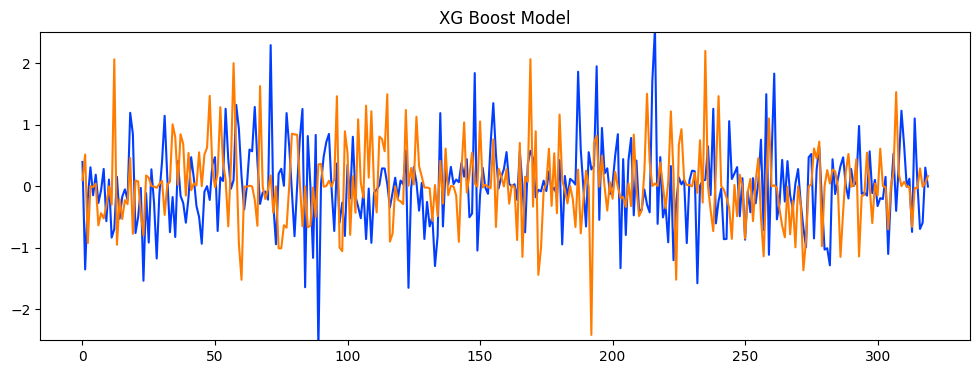

In [64]:
from xgboost import XGBRegressor


def get_val_score_xgb(n_est, lr, columns):
    
    X_train, X_val, y_train, y_val = train_test_split(X[columns], X_qual["quality"], test_size=0.2, random_state=1)
    model_xgb = XGBRegressor(n_estimators = n_est, learning_rate=lr, n_jobs=4, eval_metric="mae")
    fit_params={"verbose": False,
                "eval_set": [[X_val, y_val]]}
    
    scores = -1*cross_val_score(model_xgb, X_train, y_train, cv=5, scoring="neg_mean_absolute_error", fit_params=fit_params)
    return scores

X_train3, X_val3, y_train3, y_val3 = train_test_split(X[big3], X_qual["quality"], test_size=0.2, random_state=86)
X_train6, X_val6, y_train6, y_val6 = train_test_split(X[big6], X_qual["quality"], test_size=0.2, random_state=24)

model_xgb3 = XGBRegressor(n_estimators = 350, learning_rate=0.08, n_jobs=4)
model_xgb3.fit(X_train3, y_train3, verbose=False)
preds3_xgb = model_xgb3.predict(X_val3)

model_xgb6 = XGBRegressor(n_estimators = 500, learning_rate=0.12, n_jobs=4)
model_xgb6.fit(X_train6, y_train6, verbose=False)
preds6_xgb = model_xgb6.predict(X_val6)
fig, ax = plt.subplots(figsize=(12, 4))
#ax.plot(preds3_xgb)
#ax.plot(preds6_xgb)
ax.plot(preds3_xgb-np.asarray(list(y_val3)))
ax.plot(preds6_xgb-np.asarray(list(y_val6)))
ax.set_ylim([-2.5, 2.5])
ax.set_title("XG Boost Model")

In [65]:
big10 = ["alcohol", "volatile.acidity", "sulphates", "density", "total.sulfur.dioxide", "citric.acid", "fixed.acidity",
         "chlorides", "residual.sugar", "free.sulfur.dioxide", "pH"]

s = get_val_score_xgb(700, 0.08, big10)
s.mean()

0.42621934651598037

Let's check principle components to see if we can find any more useful features in the big3 and big6.

In [66]:
from IPython import display
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X[big3])
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
#print(X_pca)
loadings = pd.DataFrame(pca.components_.T, columns=component_names, index=big3)
print(loadings)

                       PC1       PC2       PC3
alcohol          -0.491310 -0.801306  0.341354
volatile.acidity  0.656169 -0.082799  0.750058
sulphates        -0.572762  0.592497  0.566472


In [67]:
# Add new vectorx to X inspired by PCA vectors
X["PC1"] = X["volatile.acidity"] - X["sulphates"]
X["PC2"] = X["sulphates"] - X["alcohol"]
X["PC3"] = X["volatile.acidity"] + X["sulphates"]
big3pca = big3 + ["PC1", "PC2", "PC3"]
big6pca = big6 + ["PC1", "PC2", "PC3"]
print(big3pca)

['alcohol', 'volatile.acidity', 'sulphates', 'PC1', 'PC2', 'PC3']


In [68]:
s = get_val_score_xgb(350, 0.10, big3)
spca = get_val_score_xgb(550, 0.10, big3pca)
print(s.mean())
print(spca.mean())

0.4894595613513215
0.4535559931002996


In [69]:
s = get_val_score_xgb(500, 0.10, big6)
spca = get_val_score_xgb(650, 0.10, big6pca)
print(s.mean())
print(spca.mean())

0.4259858996537971
0.4253799073025585


In [70]:
# Look for PCA vectors from the next 3 that make the big 6 b/c vectors from big3 aren't helping much.
pca = PCA()
X_pca = pca.fit_transform(X[big6])
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
#print(X_pca)
loadings = pd.DataFrame(pca.components_.T, columns=component_names, index=big6)
print(loadings)

                           PC1       PC2       PC3       PC4       PC5  \
alcohol               0.105081  0.672567  0.133684  0.049737  0.596875   
volatile.acidity     -0.554995 -0.233382 -0.003633  0.390155  0.583753   
sulphates             0.450380  0.000815  0.232818  0.843848 -0.167855   
density               0.268604 -0.618853 -0.327287  0.050050  0.340466   
total.sulfur.dioxide -0.003347 -0.327281  0.904754 -0.219755  0.100567   
citric.acid           0.637132 -0.055618 -0.047058 -0.287105  0.385703   

                           PC6  
alcohol              -0.400008  
volatile.acidity      0.380148  
sulphates             0.051951  
density              -0.565096  
total.sulfur.dioxide -0.126055  
citric.acid           0.597962  


In [71]:
X["PC4"] = X["citric.acid"] - X["volatile.acidity"]
X["PC5"] = X["alcohol"] - X["density"]
X["PC6"] = X["total.sulfur.dioxide"] - X["density"]
X["PC7"] = X["citric.acid"] - X["density"]
#def acid_balance(acid, sugar, salt):
X["PC8"] = acid_balance(X["fixed.acidity"], X["residual.sugar"], X["chlorides"])
big6pca = big6 + ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8"]
big10pca = big10 + ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8"]

In [72]:
s = get_val_score_xgb(500, 0.10, big6)
spca = get_val_score_xgb(750, 0.10, big6pca)
spca10 = get_val_score_xgb(550, 0.10, big10pca)
print(s.mean())
print(spca.mean())
print(spca10.mean())

0.4259858996537971
0.42025847965887947
0.41554216491460216


We seem to be hitting a wall for improving our XG Boost results by adding more PC vectors and properties. Let's try some unsupervised learning to see if we can make some categorical variables.

In [73]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
X["cluster3"] = kmeans.fit_predict(X[big3])
#X["cluster"] = X["cluster"].astype("category")
X_qual["cluster3"] = X["cluster3"]

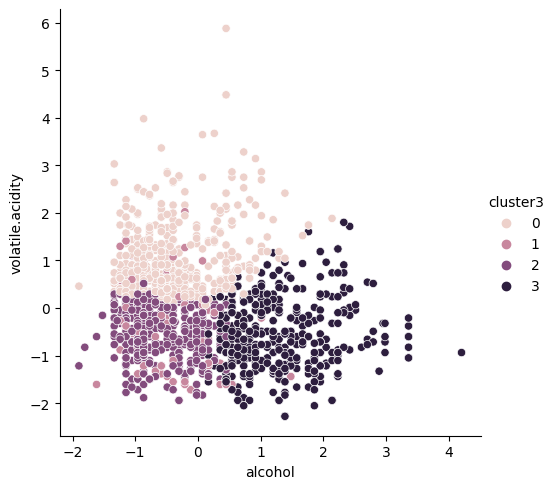

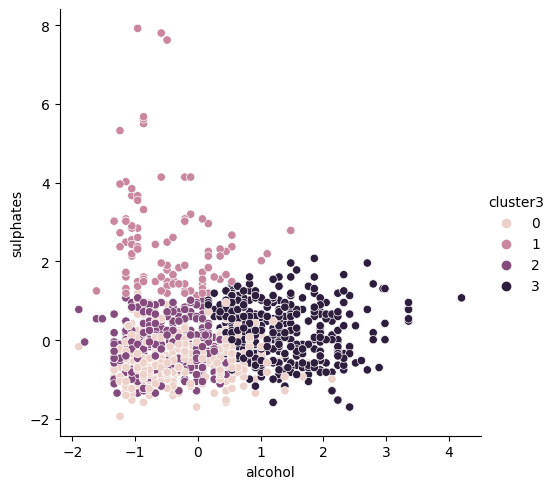

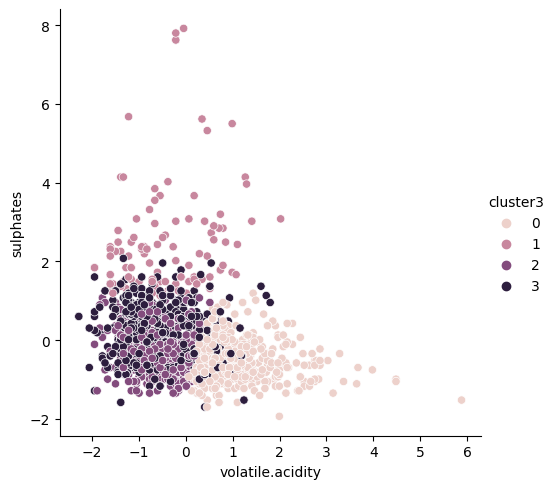

In [74]:
sns.relplot(x="alcohol", y="volatile.acidity", hue="cluster3", data=X)
sns.relplot(x="alcohol", y="sulphates", hue="cluster3", data=X)
sns.relplot(x="volatile.acidity", y="sulphates", hue="cluster3", data=X)

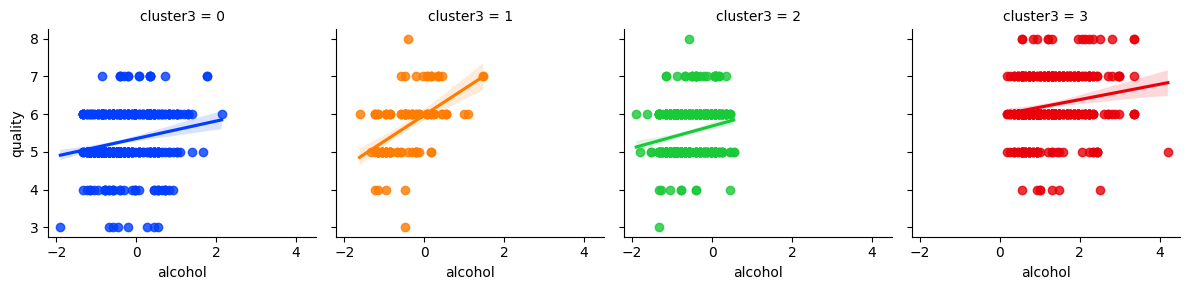

In [75]:
g=sns.FacetGrid(X_qual, col="cluster3", hue="cluster3", palette="bright")
g.map(sns.regplot, "alcohol", "quality")

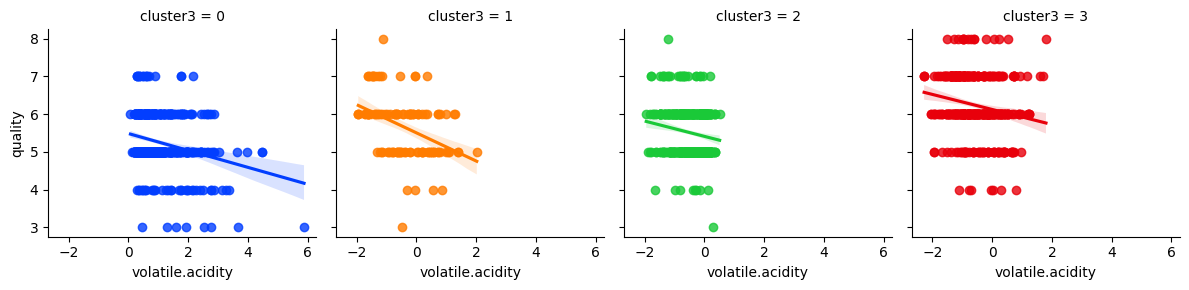

In [76]:
g=sns.FacetGrid(X_qual, col="cluster3", hue="cluster3", palette="bright")
g.map(sns.regplot, "volatile.acidity", "quality")

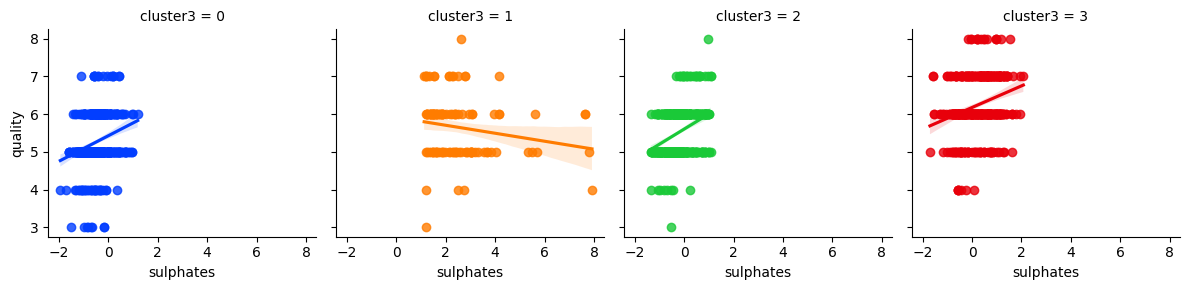

In [77]:
g=sns.FacetGrid(X_qual, col="cluster3", hue="cluster3", palette="bright")
g.map(sns.regplot, "sulphates", "quality")

In [78]:
big3pcac = big3pca + ["cluster3"]
big6pcac3 = big6pca + ["cl_slsgac"]
spca = get_val_score_xgb(350, 0.10, big3pca)
spcac = get_val_score_xgb(500, 0.10, big3pcac)
s6pcac3 = get_val_score_xgb(600, 0.07, big6pcac3)
print(spca.mean())
print(spcac.mean())
print(s6pcac3.mean())

KeyError: "['cl_slsgac'] not in index"

Adding the clustering from the big3 caused XG Boost to fail with the big6 and pca. Let's try clustering to see if it can help us gain clarity about the acid, salt, sweetness balancing.

In [ ]:
X_qual["my_chlorides"] = (data["my_chlorides"] - data["my_chlorides"].mean())/data["my_chlorides"].std()
X_qual["my_sugar"] = (data["my_sugar"] - data["my_sugar"].mean())/data["my_sugar"].std()
slsgac = ["fixed.acidity", "my_sugar", "my_chlorides"]
kmeans = KMeans(n_clusters=4)
X_qual["cl_slsgac"] = kmeans.fit_predict(X_qual[slsgac])
X_qual["cl_slsgac"] = X_qual["cl_slsgac"].astype("int")
#X_qual["cl_slsgac"] = X["cl_slsgac"]

In [ ]:
sns.relplot(x="fixed.acidity", y="my_sugar", hue="cl_slsgac", data=X_qual, height=4, palette="bright")
sns.relplot(x="fixed.acidity", y="my_chlorides", hue="cl_slsgac", data=X_qual, height=4, palette="bright")
sns.relplot(x="my_sugar", y="my_chlorides", hue="cl_slsgac", data=X_qual, height=4, palette="bright")

In [ ]:
g=sns.FacetGrid(X_qual, col="cl_slsgac", hue="cl_slsgac", palette="bright")
g.map(sns.regplot, "fixed.acidity", "quality")

In [ ]:
g=sns.FacetGrid(X_qual, col="cl_slsgac", hue="cl_slsgac", palette="bright")
g.map(sns.regplot, "my_sugar", "quality")

In [ ]:
g=sns.FacetGrid(X_qual, col="cl_slsgac", hue="cl_slsgac", palette="bright")
g.map(sns.regplot, "my_chlorides", "quality")

In [ ]:
big10pcac = big10pca + ["cl_slsgac"]
spca10c = get_val_score_xgb(600, 0.10, big10pcac)
print(spca10c.mean())

Clustering the salt, sugar, acid problem did not improve the predictiveness of the model, but did find regimes where sugar drives the quality. This is of interest to learning more about wines. Presumably, XGBoost already found this relationship during its fitting.

Next let's use XGBoost to try to classify the wines into the 'Good' and 'Bad' catagories I have prescribed. This should be different from the previous task, in which good stats were generated by choosing mostly 5 and 6 quality wines.

In [ ]:
from xgboost import XGBClassifier

# XGB doc says 'error' metric is #wrong/#all, and is for binary classification.


def get_class_score_xgb(n_est, lr, columns):
    
    X_train, X_val, y_train, y_val = train_test_split(X_qual[columns], X_qual["GoodBad"], test_size=0.2, random_state=1684)
    model_xgb = XGBClassifier(n_estimators = n_est, learning_rate=lr, n_jobs=4, eval_metric="error") 
    fit_params={"verbose": False,
                "eval_set": [[X_val, y_val]]}
    
    scores = cross_val_score(model_xgb, X_train, y_train, cv=5, scoring="accuracy", fit_params=fit_params)
    return scores

X_train3, X_val3, y_train3, y_val3 = train_test_split(X_qual[big3], X_qual["GoodBad"], test_size=0.2, random_state=86)
X_train6, X_val6, y_train6, y_val6 = train_test_split(X_qual[big6], X_qual["GoodBad"], test_size=0.2, random_state=24)

classf_xgb3 = XGBClassifier(n_estimators = 150, learning_rate=0.08, n_jobs=4)
classf_xgb3.fit(X_train3, y_train3, verbose=False)
preds3_xgb = classf_xgb3.predict(X_val3)

classf_xgb6 = XGBClassifier(n_estimators = 180, learning_rate=0.06, n_jobs=4)
classf_xgb6.fit(X_train6, y_train6, verbose=False)
preds6_xgb = classf_xgb6.predict(X_val6)
fig, ax = plt.subplots(figsize=(12, 4))
#ax.plot(preds3_xgb)
#ax.plot(preds6_xgb)
ax.plot(preds3_xgb-np.asarray(list(y_val3)))
ax.plot(preds6_xgb-np.asarray(list(y_val6))+0.1)
ax.set_ylim([-2.5, 2.5])
ax.set_title("XG Boost Model")
#print(X_qual.loc[:30, "GoodBad"])

In [ ]:
# Check the classification accuracy rate(#num correct / #num total), but compare against saying they are all bad (86%).
# Put these model parameters into the models above.
clsacc = get_class_score_xgb(180, 0.06, big3)
print(clsacc)
print(clsacc.mean())
clsacc = get_class_score_xgb(180, 0.06, big6)
print(clsacc)
print(clsacc.mean())

In [ ]:
# Check the specificity of the classification. This will likely be bad, but will be a better benchmark than accuracy since the
# model is only out performing nothing by ~400 bps.

accuracy_score(X_qual["GoodBad"], np.zeros(len(X_qual)))
goodinds = y_val6[y_val6==1].index
print(goodinds)
#print(X_val6.loc[goodinds,:])
preds6_xgb_sp = classf_xgb6.predict(X_val6.loc[goodinds,:])
print("% Good wines ID'd as such", accuracy_score(X_qual.loc[goodinds, "GoodBad"], preds6_xgb_sp))

goodpinds = np.where(preds6_xgb_sp==1)[0]
#print(y_val6[y_val6.index[goodpinds]])
#print(preds6_xgb_sp[goodpinds])
print("% ID'd Good wines that actually are", accuracy_score(y_val6[y_val6.index[goodpinds]], preds6_xgb_sp[goodpinds]))

Let's try to see what qualities the best wines have in search for a new feature to create.

In [79]:
# Create the class to make radar plots. Copied from https://matplotlib.org/stable/gallery/specialty_plots/radar_chart.html

from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


ValueError: too many values to unpack (expected 2)

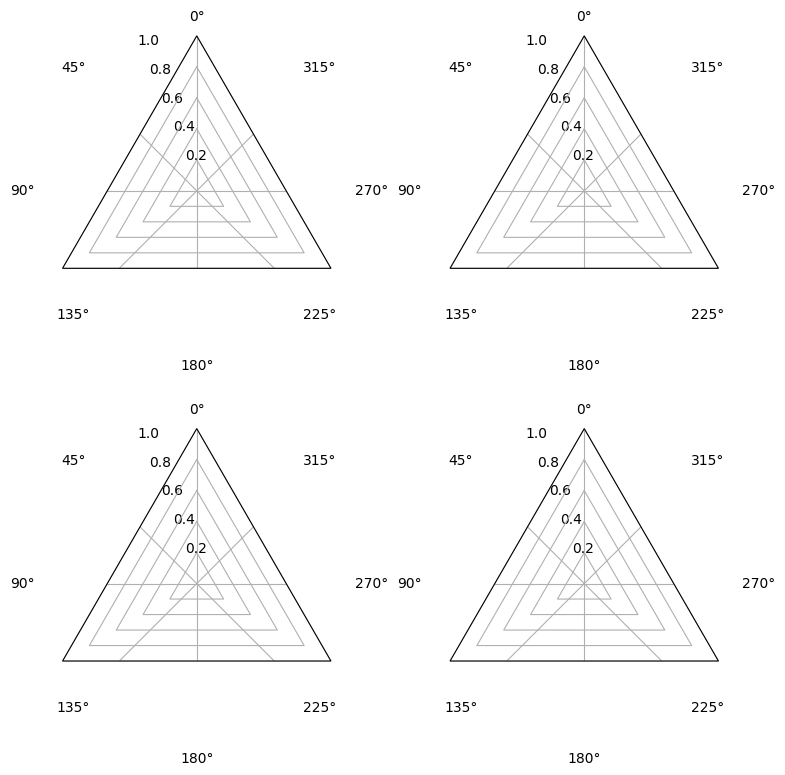

In [80]:
theta = radar_factory(3, frame='polygon')

rad_dat = X_qual[big3] # might need to reconfigure
spoke_lables = big3

fig, axs = plt.subplots(figsize=(9,9), nrows=2, ncols=2, subplot_kw=dict(projection='radar'))

fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

colors = ['b', 'r', 'g', 'm', 'y']

for x, (title, case_data) in zip(axs.flat, data):
    ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
    ax.set_title(title, weight='bold', seize='medium', position=(0.5, 1.1), 
                 horizontalalignment='center', verticalalignment='center')
    
    for d, color in zip(case_data, colors):
        ax.plot(theta, d, color=color)
        ax.fill(theta, d, facecolor=color, alpha=0.25, label='_nolegend_')
    ax.set_varlabels(spoke_labels)
    
plt.show()



In [81]:
big6

['alcohol',
 'volatile.acidity',
 'sulphates',
 'density',
 'total.sulfur.dioxide',
 'citric.acid']

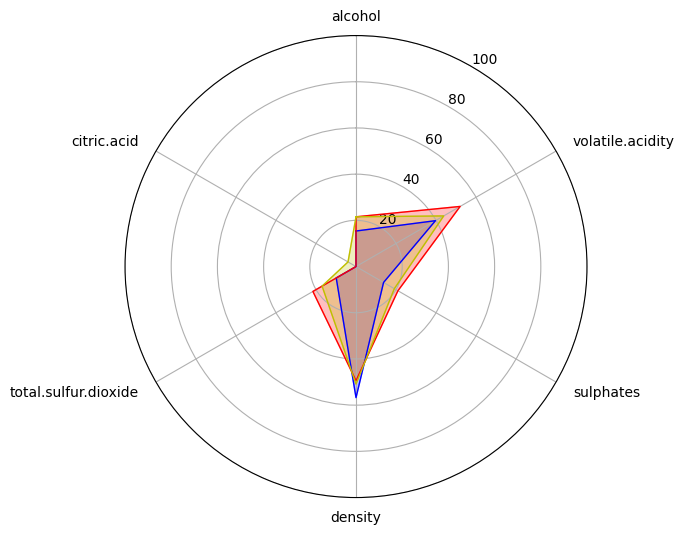

In [91]:
# Try radar plots following https://www.pythoncharts.com/matplotlib/radar-charts/
# This code successfully produces a radar plot!


def make_radar(radar_max, var_labels):
    
    
    
    
    new_max = radar_max
    new_min = 0
    new_range = new_max - new_min
    
    num_vars = len(var_labels)

    angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    ax.plot(angles, values, color='blue', linewidth=1)
    ax.fill(angles, values, color='blue', alpha=0.25)
    ax.set_theta_offset(np.pi/2.)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)

    for label, angle in zip(ax.get_xticklabels(), angles):
        if angle in (0, np.pi):
            label.set_horizontalalignment("center")
        elif 0 < angle < np.pi:
            label.set_horizontalalignment('left')
        else:
            label.set_horizontalalignment('right')
        
    ax.set_ylim(0, radar_max)

    ax.set_rlabel_position(180/num_vars)
    
    
    for factor in big6:
        max_val = X_qual[factor].max()
        min_val = X_qual[factor].min()
        val_range = max_val - min_val
        X_qual[factor+"_adj"] = X_qual[factor].apply(lambda x: (((x - min_val)*new_range)/val_range+new_min))
    
dft = X_qual.loc[:4, ["alcohol_adj", "volatile.acidity_adj", "sulphates_adj", 
                      "density_adj", "total.sulfur.dioxide_adj", "citric.acid_adj"]]

labels = big6

values = dft.loc[0].tolist()

num_vars = len(var_labels)

angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()

values += values[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.plot(angles, values, color='blue', linewidth=1)
ax.fill(angles, values, color='blue', alpha=0.25)
ax.set_theta_offset(np.pi/2.)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)

for label, angle in zip(ax.get_xticklabels(), angles):
    if angle in (0, np.pi):
        label.set_horizontalalignment("center")
    elif 0 < angle < np.pi:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('right')
        
ax.set_ylim(0, radar_max)

ax.set_rlabel_position(180/num_vars)

def add_to_radar(ind, color):
    values =  dft.loc[ind].tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=1, label=str(ind))
    ax.fill(angles, values, color=color, alpha=0.25)
    
add_to_radar(1, 'red')
add_to_radar(2, 'y')